In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [269]:
sns.set_style('whitegrid')

In [270]:
df = pd.read_excel('Data_Level4_UMDOTS_CampusTrafficCount.xlsx')

divide time into hour, day and day of week

In [271]:
df['time'] = pd.to_datetime(df['time'])

In [272]:
df['Hour'] = df['time'].apply(lambda time: time.hour)

In [273]:
df['Day'] = df['time'].apply(lambda time: time.day)

In [274]:
df['Dow'] = df['time'].apply(lambda time: time.dayofweek)

In [275]:
df['Weekend'] = df['Dow'].apply(lambda x: 1 if x >= 6 else 0)

disgard data of Nov.11

In [276]:
df.drop(df[df['Day'] == 11].index, inplace=True)

In [277]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

add event column

In [278]:
df1 = pd.read_csv('clean data.csv', delimiter=',', header=None)

In [279]:
df['event'] = df1[8]

clean extreme values

In [280]:
modes = ['cars', 'buses', 'trucks']
for mode in modes:
    df[mode] = df[mode].apply(lambda x: 375 if x > 375 else x)

check dataset

In [281]:
df.head()

,time,pedestrians,bicyclists,cars,buses,trucks,location,Hour,Day,Dow,Weekend,event
0,2019-10-28 00:00:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,0,28,0,0,0.0
1,2019-10-28 00:15:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,0,28,0,0,0.0
2,2019-10-28 00:30:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,0,28,0,0,0.0
3,2019-10-28 00:45:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,0,28,0,0,0.0
4,2019-10-28 01:00:00-04:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,1,28,0,0,0.0


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype                                 
---  ------       --------------  -----                                 
 0   time         13440 non-null  datetime64[ns, pytz.FixedOffset(-240)]
 1   pedestrians  13440 non-null  int64                                 
 2   bicyclists   13440 non-null  int64                                 
 3   cars         13440 non-null  int64                                 
 4   buses        13440 non-null  int64                                 
 5   trucks       13440 non-null  int64                                 
 6   location     13440 non-null  object                                
 7   Hour         13440 non-null  int64                                 
 8   Day          13440 non-null  int64                                 
 9   Dow          13440 non-null  int64                                 
 10  Weekend   

In [283]:
df.describe() #descriptive statistics

,pedestrians,bicyclists,cars,buses,trucks,Hour,Day,Dow,Weekend,event
count,13440.000000,13440.000000,13440.000000,13440.00000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000
mean,77.236682,15.906622,114.753274,4.62381,5.738914,11.500000,12.357143,3.000000,0.142857,0.068452
std,157.177424,54.260095,125.084910,7.03762,8.435452,6.922444,11.127005,2.000074,0.349940,0.252530
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,0.00000,0.000000,5.750000,4.000000,1.000000,0.000000,0.000000
50%,7.000000,0.000000,66.000000,2.00000,2.000000,11.500000,7.500000,3.000000,0.000000,0.000000
75%,78.000000,7.000000,188.000000,6.00000,9.000000,17.250000,28.000000,5.000000,0.000000,0.000000
max,1558.000000,713.000000,375.000000,75.00000,101.000000,23.000000,31.000000,6.000000,1.000000,1.000000


initial EDA visualization

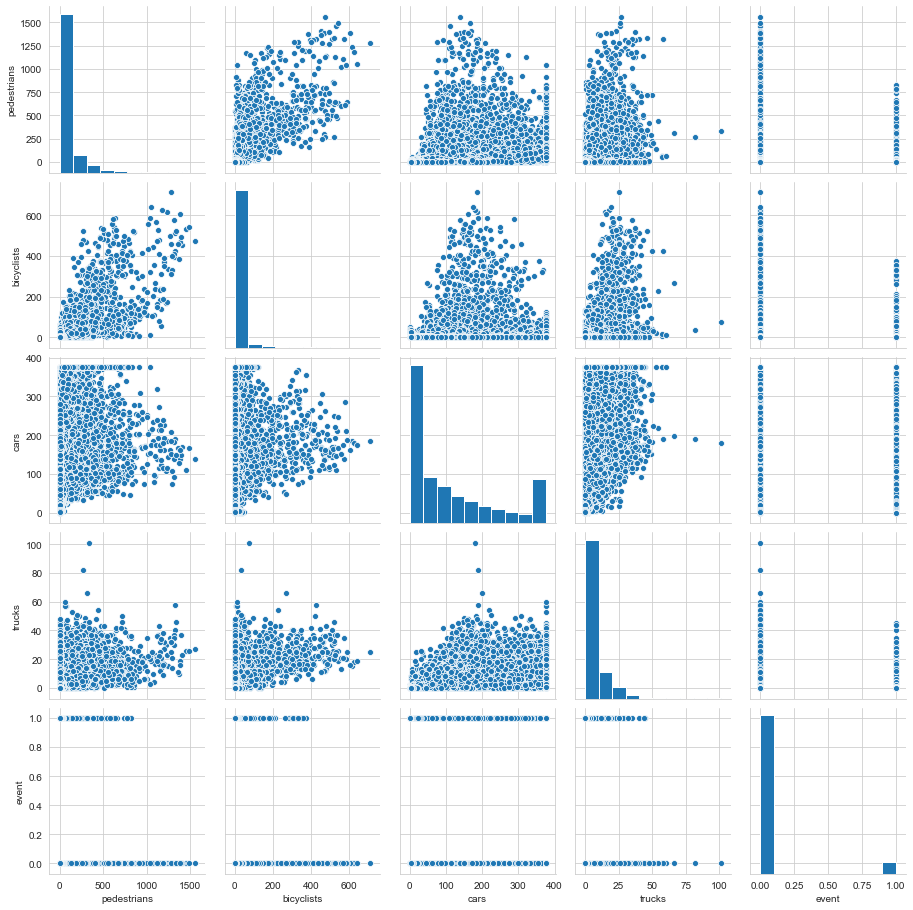

In [284]:
sns.pairplot(data=df[['pedestrians', 'bicyclists', 'cars', 'trucks', 'event']]) # pair plot

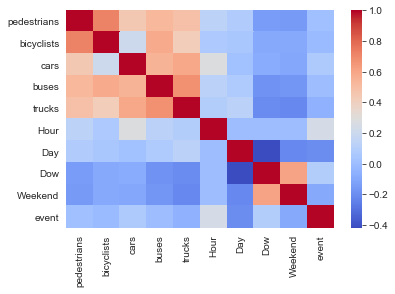

In [285]:
sns.heatmap(df.corr(), cmap='coolwarm') # heatmap for correlation

Text(0.5, 1.0, 'Avg Cars count per hour for 14 days')

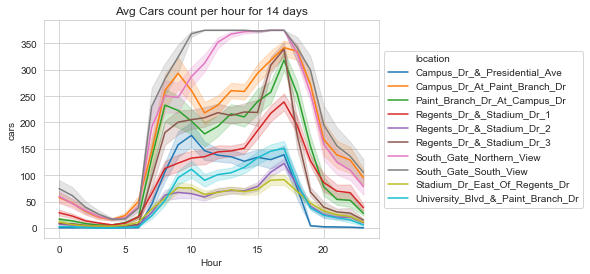

In [286]:
axes_cars = sns.lineplot(x='Hour', y='cars', hue='location', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_cars.set_title('Avg Cars count per hour for 14 days')

Text(0.5, 1.0, 'Avg Buses count per hour for 14 days')

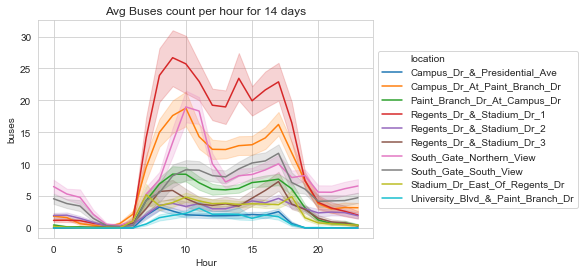

In [287]:
axes_buses = sns.lineplot(x='Hour', y='buses', hue='location', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_buses.set_title('Avg Buses count per hour for 14 days')

Text(0.5, 1.0, 'Avg Trucks count per hour for 14 days')

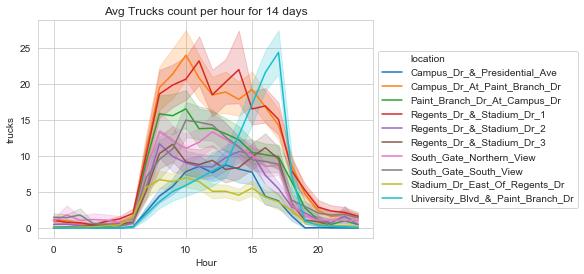

In [288]:
axes_Trucks = sns.lineplot(x='Hour', y='trucks', hue='location', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_Trucks.set_title('Avg Trucks count per hour for 14 days')

Text(0.5, 1.0, 'Avg Pedestrians count per hour for 14 days')

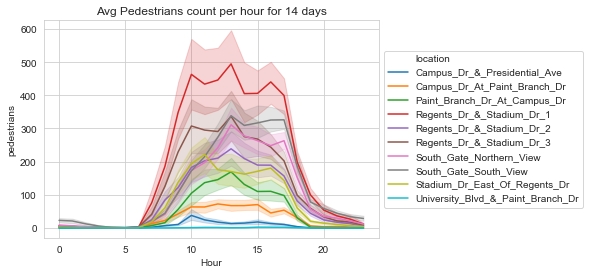

In [289]:
axes_pedestrians = sns.lineplot(x='Hour', y='pedestrians', hue='location', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_pedestrians.set_title('Avg Pedestrians count per hour for 14 days')

Text(0.5, 1.0, 'Avg Bicyclists count per hour for 14 days')

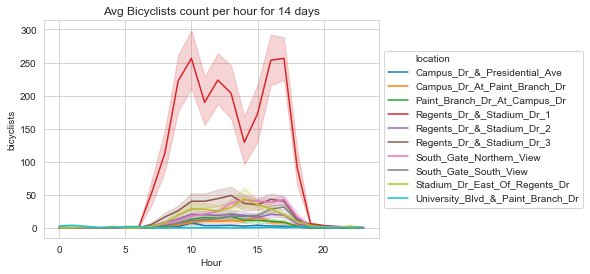

In [290]:
axes_bicyclists = sns.lineplot(x='Hour', y='bicyclists', hue='location', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_bicyclists.set_title('Avg Bicyclists count per hour for 14 days')

Text(0.5, 1.0, 'Traffic modes average count per hour for 14 days')

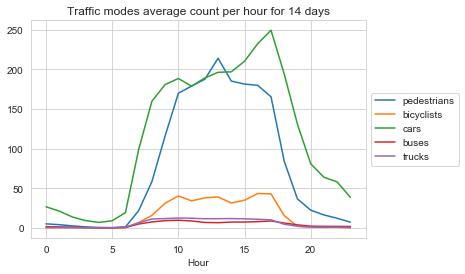

In [291]:
axes_sum = df[['pedestrians', 'bicyclists', 'cars', 'buses', 'trucks', 'Hour']].groupby('Hour').mean().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_sum.set_title('Traffic modes average count per hour for 14 days')

Text(0.5, 1.0, 'Bus and Truck average count per hour for 14 days')

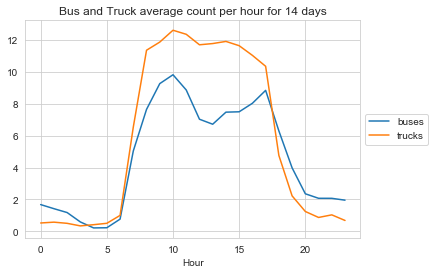

In [292]:
axes_sum2 = df[['buses', 'trucks', 'Hour']].groupby('Hour').mean().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_sum2.set_title('Bus and Truck average count per hour for 14 days')

Text(0.5, 1.0, 'Non-event traffic location count per hour for 14 days')

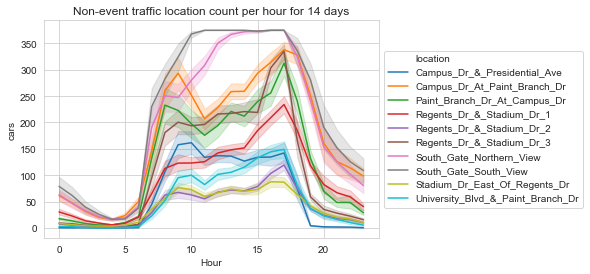

In [293]:
axes_non_event = sns.lineplot(x='Hour', y='cars', data=df[df['event']==0], hue='location')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_non_event.set_title('Non-event traffic location count per hour for 14 days')

Text(0.5, 1.0, 'Event day traffic mode count per hour for 14 days')

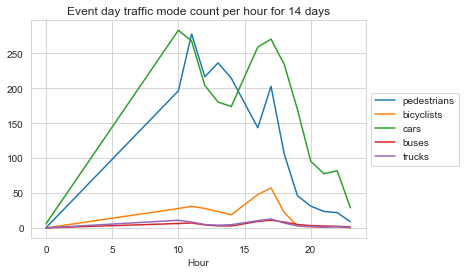

In [294]:
axes_sum_non_event = df[['pedestrians', 'bicyclists', 'cars', 'buses', 'trucks', 'Hour']].where(df['event']==1, axis=0).groupby('Hour').mean().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_sum_non_event.set_title('Event day traffic mode count per hour for 14 days')

Text(0.5, 1.0, 'Non-event day traffic mode count per hour for 14 days')

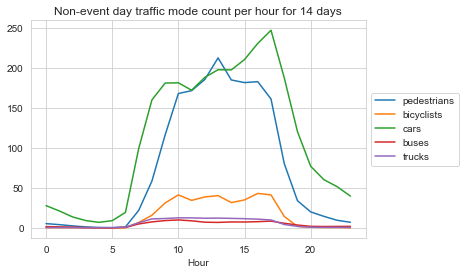

In [295]:
axes_sum_non_event = df[['pedestrians', 'bicyclists', 'cars', 'buses', 'trucks', 'Hour']].where(df['event']==0, axis=0).groupby('Hour').mean().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_sum_non_event.set_title('Non-event day traffic mode count per hour for 14 days')

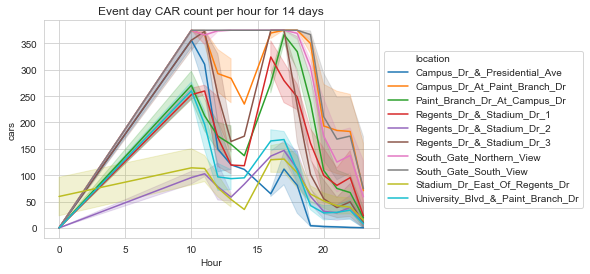

<Figure size 360x1440 with 0 Axes>

In [296]:
axes_cars = sns.lineplot(x='Hour', y='cars', hue='location', data=df[df['event']==1])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_cars.set_title('Event day CAR count per hour for 14 days')
fig = plt.figure(figsize=(5,20))

Text(0.5, 1.0, 'Non-event day CAR count per hour for 14 days')

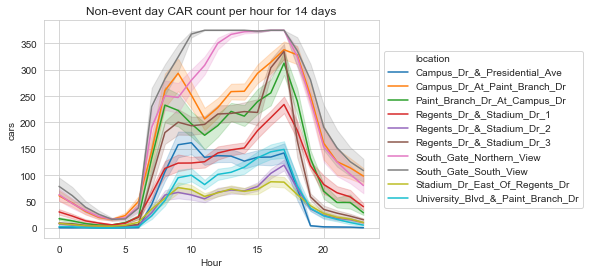

In [297]:
axes_cars = sns.lineplot(x='Hour', y='cars', hue='location', data=df[df['event']==0])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes_cars.set_title('Non-event day CAR count per hour for 14 days')

adding in and cleaning weather data

In [298]:
df_weather = pd.read_fwf("https://www.ncdc.noaa.gov/orders/isd/5296758162886dat.txt") # read data

In [299]:
df_weather[['PCP01', 'PCP06']] = df_weather['PCP01 PCP06'].str.split(expand=True) # correct wrong read

In [300]:
df_weather.drop(["USAF", "WBAN"], axis=1, inplace=True) # drop weather station information

In [301]:
df_weather.columns # check columns

Index(['YR--MODAHRMN', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L', 'M', 'H', 'VSB',
       'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2', 'AW.3', 'W', 'TEMP',
       'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01 PCP06', 'PCP24',
       'PCPXX SD', 'PCP01', 'PCP06'],
      dtype='object')

In [302]:
df_weather[['YR--MODAHRMN', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L', 'M', 'H', 'VSB',
       'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2', 'AW.3', 'W', 'TEMP',
       'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01 PCP06', 'PCP24',
       'PCPXX SD', 'PCP01', 'PCP06']] = df_weather[['YR--MODAHRMN', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L', 'M', 'H', 'VSB',
       'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2', 'AW.3', 'W', 'TEMP',
       'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01 PCP06', 'PCP24',
       'PCPXX SD', 'PCP01', 'PCP06']].apply(pd.to_numeric, errors='coerce') # convert data into numeric data type

In [303]:
df_weather['YR--MODAHRMN'] = pd.to_datetime(df_weather['YR--MODAHRMN'], format="%Y%m%d%H%M") # convert time into timestamp

In [304]:
df_weather.drop('GUS', axis=1, inplace=True) # Drop GUS. See dictionary for reference

In [305]:
df_weather.drop('SKC', axis=1, inplace=True)
df_weather.drop('PCPXX SD', axis=1, inplace=True) # Drop column because all is Null

In [306]:
df_weather.drop(['L', 'M', 'H'], axis=1, inplace=True)
df_weather.drop(['MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2', 'AW.3', 'W'], axis=1, inplace=True)
df_weather.drop(['SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01 PCP06', 'PCP24', 'PCP06'], axis=1, inplace=True) # Drop for obvious reasons

In [307]:
df_weather['CLG'] = df_weather['CLG'].apply(lambda x: df_weather['CLG'].mean() if pd.isnull(x) else x)
df_weather['TEMP'] = df_weather['TEMP'].apply(lambda x: df_weather['TEMP'].mean() if pd.isnull(x) else x) 
df_weather['DEWP'] = df_weather['DEWP'].apply(lambda x: df_weather['DEWP'].mean() if pd.isnull(x) else x)
df_weather['PCP01'] = df_weather['PCP01'].apply(lambda x: 0 if pd.isnull(x) else x) # if null, no rain
df_weather['SPD'] = df_weather['SPD'].apply(lambda x: df_weather['SPD'].mean() if pd.isnull(x) else x)
df_weather['VSB'] = df_weather['VSB'].apply(lambda x: df_weather['VSB'].mean() if pd.isnull(x) else x)
df_weather['PCP01'] = df_weather['PCP01'].apply(lambda x: df_weather['PCP01'].mean() if pd.isnull(x) else x)
df_weather['DIR'] = df_weather['DIR'].apply(lambda x: 0 if pd.isnull(x) else x)# if null, mean

In [308]:
df_weather['day'] = df_weather['YR--MODAHRMN'].apply(lambda x: x.day)
df_weather['hour'] = df_weather['YR--MODAHRMN'].apply(lambda x: x.hour) # get day and hour

In [309]:
df_weather['hour_increase'] = df_weather['hour'].pct_change()
df_weather = df_weather[df_weather['day'] != 11]
df_weather = df_weather[df_weather['hour_increase'] != 0]
df_weather['hour_increase'].iloc[1] = 1
df_weather.dropna(inplace=True)
df_weather = df_weather.reset_index()
df_weather = df_weather.drop(['index', 'hour_increase', 'YR--MODAHRMN'], axis=1)
# drop unneccesary rows and columns

In [310]:
df_weather.rename(columns={"DIR": "wind_direction", "SPD": "wind_speed", "CLG": "cloud_height", "VSB": "visibility", "DEWP": "humidity", "PCP01": "rain"}, inplace=True)
# rename columns

In [311]:
df_weather.head()

,wind_direction,wind_speed,cloud_height,visibility,TEMP,humidity,rain,day,hour
0,310.0,8.0,722.00000,10.0,67.0,51.0,0.0,28,0
1,310.0,6.0,722.00000,10.0,65.0,51.0,0.0,28,1
2,320.0,6.0,722.00000,10.0,67.0,52.0,0.0,28,2
3,320.0,6.0,398.65679,10.0,67.0,52.0,0.0,28,3
4,10.0,7.0,722.00000,10.0,64.0,51.0,0.0,28,4


In [312]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wind_direction  336 non-null    float64
 1   wind_speed      336 non-null    float64
 2   cloud_height    336 non-null    float64
 3   visibility      336 non-null    float64
 4   TEMP            336 non-null    float64
 5   humidity        336 non-null    float64
 6   rain            336 non-null    float64
 7   day             336 non-null    int64  
 8   hour            336 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 23.8 KB


In [313]:
df = pd.merge(df, df_weather,  how='inner', left_on=["Day", "Hour"], right_on = ["day", "hour"]) 
df.drop(['hour', 'day'], axis=1, inplace=True) # merging

adding in road features and cleaning data

In [314]:
df_road = pd.read_excel('UMDOTS_with_event_road feature(3).xlsx')

In [315]:
df_road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13480 entries, 0 to 13479
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   time                                      13480 non-null  object 
 1   pedestrians                               13480 non-null  int64  
 2   bicyclists                                13480 non-null  int64  
 3   cars                                      13480 non-null  int64  
 4   buses                                     13480 non-null  int64  
 5   trucks                                    13480 non-null  int64  
 6   location                                  13480 non-null  object 
 7   Unnamed: 7                                0 non-null      float64
 8   Unnamed: 8                                0 non-null      float64
 9   event                                     920 non-null    object 
 10  Unnamed: 10                       

In [316]:
df_road['time'] = pd.to_datetime(df_road['time'])
df_road['hour'] = df_road['time'].apply(lambda time: time.hour)
df_road['day'] = df_road['time'].apply(lambda time: time.day)

In [317]:
df_road.drop(['time', 'pedestrians', 'bicyclists', 'cars', 'buses', 'trucks', 'Unnamed: 7', 'Unnamed: 8', 'event', 'Unnamed: 10'], axis=1, inplace=True)
# drop columns

In [318]:
df_road.rename(columns={"slope (1=yes, 0=no)": "slope", "lane (1=multiple, 0=single) ": "multi_lane", "traffic light (1=yes, 0=no or stop sign)": "traffic_light", "speed limit": "speed_limit"}, inplace=True)
# rename columns

In [319]:
df_road.columns

Index(['location', 'slope', 'multi_lane', 'traffic_light', 'speed_limit',
       'hour', 'day'],
      dtype='object')

In [320]:
df_road = df_road.groupby('location').first().drop(['hour', 'day'], axis=1)

In [321]:
df_road

,slope,multi_lane,traffic_light,speed_limit
location,,,,
Campus_Dr_&_Presidential_Ave,0,1,1,20
Campus_Dr_At_Paint_Branch_Dr,1,1,0,15
Paint_Branch_Dr_At_Campus_Dr,1,1,0,15
Regents_Dr_&_Stadium_Dr_1,1,1,0,15
Regents_Dr_&_Stadium_Dr_2,1,1,0,15
Regents_Dr_&_Stadium_Dr_3,1,1,0,15
South_Gate_Northern_View,1,1,1,25
South_Gate_South_View,1,1,1,25
Stadium_Dr_East_Of_Regents_Dr,1,1,0,15


In [322]:
df_road.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Campus_Dr_&_Presidential_Ave to University_Blvd_&_Paint_Branch_Dr
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   slope          10 non-null     int64
 1   multi_lane     10 non-null     int64
 2   traffic_light  10 non-null     int64
 3   speed_limit    10 non-null     int64
dtypes: int64(4)
memory usage: 400.0+ bytes


In [323]:
df = pd.merge(df, df_road,  how='inner', on='location') # merging

more data cleaning

In [324]:
df = df[df['location'] != 'South_Gate_South_View']
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True) # get rid of South Gate South View because of extreme, unreal values

In [325]:
df.drop('multi_lane', axis=1, inplace=True) # drop multi_lane because all is 1

In [326]:
def locations(x):
    if x in ['Campus_Dr_&_Presidential_Ave']:
        return 'southwest entrance'
    elif x in ['Campus_Dr_At_Paint_Branch_Dr', 'Paint_Branch_Dr_At_Campus_Dr']:
        return 'main entrance'
    elif x in ['Regents_Dr_&_Stadium_Dr_1', 'Regents_Dr_&_Stadium_Dr_2', 'Regents_Dr_&_Stadium_Dr_3','Stadium_Dr_East_Of_Regents_Dr']:
        return 'center campus'
    elif x in ['South_Gate_Northern_View']:
        return 'south gate'
    else:
        return 'north entrance'

df['aproximate location'] = df['location'].apply(locations)
df = df.groupby(['aproximate location', 'time']).mean().reset_index() #shrink to 5 locations

In [327]:
def speed_limit(x):
    if x == 20.0:
        return "low"
    elif x == 30.0:
        return "high"
    else:
        return "medium"
df['speed_limit'] = df['speed_limit'].apply(speed_limit) # catagorize speed limit

In [328]:
def wind_direction(x):
    if x == 0:
        return "calm"
    elif 45 <= x < 135:
        return "east"
    elif 135 <= x < 225:
        return "south"
    elif 225 <= x < 315:
        return "west"
    else:
        return "north" 
df['wind_direction'] = df['wind_direction'].apply(wind_direction) # catagorized wind direction into 4 directions or no-wind

In [329]:
df.rename(columns={"aproximate location": "location"}, inplace=True)
# rename column

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype                                 
---  ------          --------------  -----                                 
 0   location        6720 non-null   object                                
 1   time            6720 non-null   datetime64[ns, pytz.FixedOffset(-240)]
 2   pedestrians     6720 non-null   float64                               
 3   bicyclists      6720 non-null   float64                               
 4   cars            6720 non-null   float64                               
 5   buses           6720 non-null   float64                               
 6   trucks          6720 non-null   float64                               
 7   Hour            6720 non-null   float64                               
 8   Day             6720 non-null   float64                               
 9   Dow             6720 non-null   float64             

In [331]:
df.head()

,location,time,pedestrians,bicyclists,cars,buses,trucks,Hour,Day,Dow,...,wind_direction,wind_speed,cloud_height,visibility,TEMP,humidity,rain,slope,traffic_light,speed_limit
0,center campus,2019-10-28 00:00:00-04:00,3.25,0.0,13.50,1.50,0.25,0.0,28.0,0.0,...,west,8.0,722.0,10.0,67.0,51.0,0.0,1.0,0.0,medium
1,center campus,2019-10-28 00:15:00-04:00,2.25,0.0,10.25,1.00,0.50,0.0,28.0,0.0,...,west,8.0,722.0,10.0,67.0,51.0,0.0,1.0,0.0,medium
2,center campus,2019-10-28 00:30:00-04:00,0.75,0.0,7.50,0.75,0.25,0.0,28.0,0.0,...,west,8.0,722.0,10.0,67.0,51.0,0.0,1.0,0.0,medium
3,center campus,2019-10-28 00:45:00-04:00,1.00,0.0,11.50,0.50,0.00,0.0,28.0,0.0,...,west,8.0,722.0,10.0,67.0,51.0,0.0,1.0,0.0,medium
4,center campus,2019-10-28 01:00:00-04:00,0.75,0.0,7.50,1.50,0.25,1.0,28.0,0.0,...,west,6.0,722.0,10.0,65.0,51.0,0.0,1.0,0.0,medium


In [267]:
df.to_csv('C:\\Users\\david\\data.csv')